In [19]:
from lib.simulation import Statistics, load_logs, stats_to_numpy
import ca_run
import os
%pylab
%matplotlib inline

paths = ["logs/" + path for path in os.listdir("logs") if path[:3] == 'coh']

cutoff = 4000
surviving = []
critical_ratio = 0.1
critical = []
for path in paths:
    ratio = float(path[8:])
    pars, stats = load_logs(path)
    s, bc, sc, ss = stats_to_numpy(stats, pars)
    bcm = bc.mean(axis=0)
    surviving.append(bcm[cutoff // pars.resolution])
    critical.append(np.argmax(bcm <= pars.boid_count * critical_ratio))

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


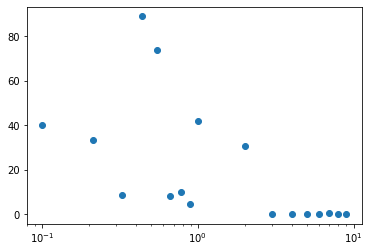

In [20]:
plt.scatter(ratios, surviving)
plt.xscale('log')

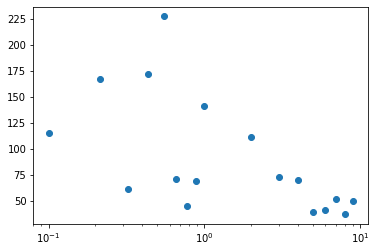

In [21]:
plt.scatter(ratios, critical)
plt.xscale('log')

In [3]:
list(type(stat) for stat in stats)

[lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics]

In [5]:
%pylab
%matplotlib inline
from scipy.stats import entropy

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [6]:
s, bc, sc, ss = stats[0].to_numpy(pars)
x = np.arange(s)

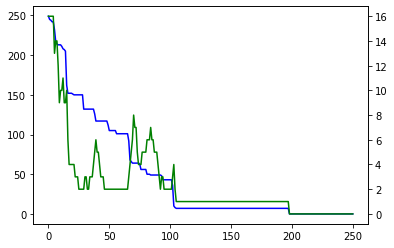

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bc, c='b')
ax2 = ax.twinx()
ax2.plot(x, sc, c='g')
plt.show()

/home/main/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


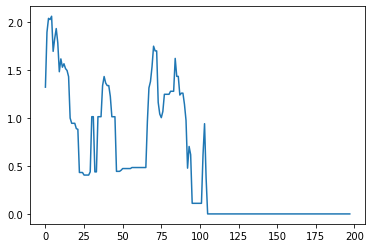

In [8]:
ssen = entropy(ss, axis=1)
plt.plot(x, ssen)

In [9]:
!pip3 update scipy

ERROR: unknown command "update"


In [10]:
s, bc, sc, ss = stats_to_numpy(stats, pars)
x = np.arange(s)
ss.shape

(10, 251, 16)

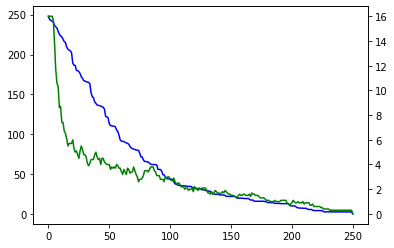

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bc.mean(axis=0), c='b')
ax2 = ax.twinx()
ax2.plot(x, sc.mean(axis=0), c='g')
plt.show()

/home/main/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


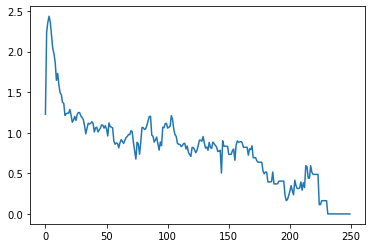

In [12]:
ssen = entropy(ss.mean(axis=0), axis=1)
plt.plot(x, ssen)

In [ ]:
(stats[0].duration, stats[0].iterations)